# Arrays numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

## Indexando e fatiando arrays

Os arrays podem ser acessados de forma similar a sequências em Python. Lembre que os índices começam em zero.

In [2]:
a = np.linspace(1, 2, 21)

In [3]:
a

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [4]:
a[0] # Experimente outros números. Que tal -1? 

1.0

Podemos tomar uma fatia (*slice*) de um array da mesma forma que fazemos com sequências.

In [5]:
a[2:9:3] # início:fim:passo. "fim" não está incluído.

array([1.1 , 1.25, 1.4 ])

É possível omitir qualquer parte da indexação.

In [6]:
a[10:] # do elemento 10 até o final.

array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [7]:
a[:10] # até o elemento 10-1 = 9

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45])

In [8]:
a[::2] # saltando de 2 em 2.

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [9]:
a[::-1] # saltando de trás pra frente.

array([2.  , 1.95, 1.9 , 1.85, 1.8 , 1.75, 1.7 , 1.65, 1.6 , 1.55, 1.5 ,
       1.45, 1.4 , 1.35, 1.3 , 1.25, 1.2 , 1.15, 1.1 , 1.05, 1.  ])

Arrays multidimensionais podem ser indexados por tuplas.

In [10]:
b = np.diag(np.arange(3))

In [11]:
b

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [12]:
b[1, 1]

1

In [13]:
b[2, 1] = 10

In [14]:
b

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

Podemos fazer fatias do mesmo jeito que no caso unidimensional.

In [15]:
b[1, 1:3]

array([1, 0])

In [16]:
b[1,:] #  linha 1, todas as colunas.

array([0, 1, 0])

Podemos omitir os `:` das dimensões à direita para simplificar a notação.

In [17]:
b[1]

array([0, 1, 0])

Uma ilustração das formas de indexar arrays.

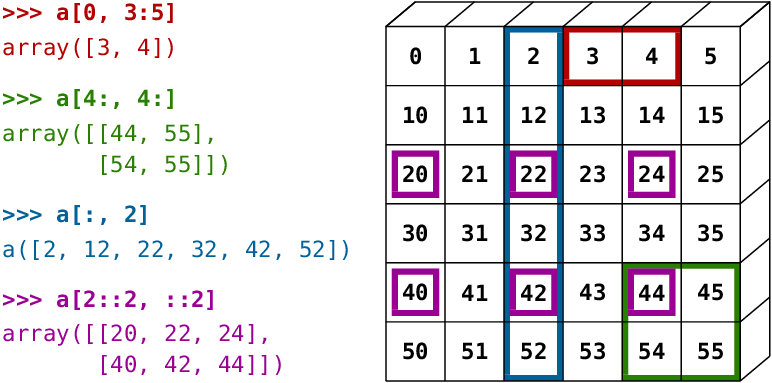

### Exercício 1

Crie um array unidimensional com números inteiros crescentes e maiores que zero. Faça slices contendo apenas os números pares e números ímpares.

In [18]:
x = np.arange(1, 20)
print(x)
impares = x[::2]
print(impares)
pares = x[1::2]
print(pares)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1  3  5  7  9 11 13 15 17 19]
[ 2  4  6  8 10 12 14 16 18]


### Cópias e *views*

Quando tomamos um slice usando indexação, o resultado é outro array. Este novo array é uma *view* do array original, isto é, aponta para os mesmos dados que o array original.

In [19]:
a = np.arange(10)

In [20]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
b = a[::2]

In [22]:
b

array([0, 2, 4, 6, 8])

In [23]:
b[0] = 12

In [24]:
b

array([12,  2,  4,  6,  8])

In [25]:
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

Isto pode parecer estranho, mas é o comportamento esperado. Se quisermos modificar a fatia sem modificar o array original, precisamos fazer uma cópia explicitamente.

In [26]:
a = np.arange(10)
c = a[::2].copy()
c[0] = 12

In [27]:
c

array([12,  2,  4,  6,  8])

In [28]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Aritmética envolvendo arrays booleanos



In [29]:
import numpy as np

### Operadores relacionais

São operações de comparação entre os elementos de arrays. O resultado é um array de booleanos. Já vimos isso ser usado num dos exemplos acima, essas operações são comumente usadas para criar máscaras a serem aplicadas a arrays.

In [30]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = a == b

In [31]:
c

array([False,  True, False,  True])

In [32]:
a > b

array([False, False,  True, False])

### Operadores lógicos

Esses são operadores da lógica booleana. Incluem AND, OR, NOT e XOR. Note que em Python existem os operadores `and`, `or` e `not`, eles se aplicam apenas a booleanos escalares.

In [33]:
a = np.array([1, 1, 0, 0], dtype='bool')
b = np.array([1, 0, 1, 0], dtype='bool')

In [34]:
# AND
c = a & b

In [35]:
c

array([ True, False, False, False])

In [36]:
# OR
a | b

array([ True,  True,  True, False])

In [37]:
# XOR
a ^ b

array([False,  True,  True, False])

In [38]:
# NOT
~a

array([False, False,  True,  True])

**Atenção:** Os operadores lógicos são aplicados elemento a elemento em arrays do tipo `bool`. Se os arrays forem de tipo numérico (`int`, `float`, etc), os operadores são aplicados *bit a bit*, podendo gerar resultados não muito intuitivos para quem não conhece a aritmética booleana de números binários.

In [39]:
d = np.arange(10) & 5

In [40]:
d

array([0, 1, 0, 1, 4, 5, 4, 5, 0, 1])

### Reduções lógicas

Operam em arrays de booleanos, e retornam um booleano.

In [41]:
# Retorna True se todos os elementos forem True.
np.all([True, True, False])

False

In [42]:
# Retorna True se pelo menos um dos elementos for True.
np.any([True, True, False])

True

In [43]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

In [44]:
((a <= b) & (b <= c)).all()

True

### Indexação avançada (*fancy indexing*)

Um arrays pode ser indexado usando outro array com valores booleanos. Este array de booleano é chamado de máscara (*mask*).

In [45]:
np.random.seed(1234)
a = np.random.rand(10)

In [46]:
a

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263])

In [47]:
mask = a > 0.5 # elementos de a maiores que 0.5

In [48]:
mask

array([False,  True, False,  True,  True, False, False,  True,  True,
        True])

In [49]:
b = a[mask] # somente os elementos de a talque a máscara é True.

In [50]:
b

array([0.62210877, 0.78535858, 0.77997581, 0.80187218, 0.95813935,
       0.87593263])

**Importante!!!** A indexação avançada cria uma cópia automaticamente. `b` e `a` não compartilham os mesmos dados.

In [51]:
b[0] = 99

In [52]:
b

array([99.        ,  0.78535858,  0.77997581,  0.80187218,  0.95813935,
        0.87593263])

In [53]:
a

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263])

Geralmente podemos escrever diretamente a máscara para abreviar o código.

In [54]:
b = a[a > 0.5] # elementos de a, tal que a > 0.5.

In [55]:
b

array([0.62210877, 0.78535858, 0.77997581, 0.80187218, 0.95813935,
       0.87593263])

Uma outra forma de indexação avançada é utilizar arrays com inteiros. Esta também cria uma cópia por natureza.

In [56]:
a = np.linspace(1, 2, 21)

In [57]:
a

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [58]:
mask = np.array([2, 3, 2, 4, 2])
b = a[mask]

In [59]:
b

array([1.1 , 1.15, 1.1 , 1.2 , 1.1 ])

Veja que podemos ter índices repetidos. Note também que o array resultante tem o mesmo tamanho do array de índices.

Podemos usar indexação avançada no lado esquerdo da igualdade para modificar valores no array original. esta operação **não** cria uma cópia.

In [60]:
a = np.arange(20)

In [61]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [62]:
mask = (a % 2 == 1) # número é ímpar

In [63]:
mask

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True])

In [64]:
a[mask] = -1

In [65]:
a

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16,
       -1, 18, -1])

In [66]:
b = np.zeros(20)
primes = np.array([2, 3, 5, 7, 11, 13, 17, 19])
b[primes] = 1

In [67]:
b

array([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1.])

### Exercício 2

Vamos analisar alguns dados usados para classificação de flores, do catálogo [Iris](https://archive.ics.uci.edu/dataset/53/iris).

[Unwin & Kleinman (2021)](https://doi.org/10.1111/1740-9713.01589).

![](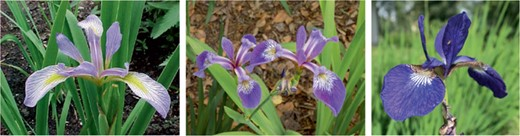
)

Abaixo, vamos obter a tabela e guardá-la como dois arrays, um com a classificação em espécie, e outro com as colunas contendo medidas das flores, em centímetros. 

In [68]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_class = np.genfromtxt(url, delimiter=',', dtype='U15', usecols=[4])
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])

Cada elemento do array `iris_class` corresponde à uma linha do array `iris_2d`, que contém 4 colunas:

- Comprimento da sépala;
- Largura da sépala;
- Comprimento da pétala;
- Largura da pétala.

Podemos saber quais as espécies existentes fazendo

In [69]:
np.unique(iris_class)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

**a.** Descubra quais os valores mínimos e máximos de cada coluna.

In [70]:
mínimos = np.min(iris_2d, axis=0)
máximos = np.max(iris_2d, axis=0)
print(mínimos)
print(máximos)

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]


**b.** Faça um histograma do comprimento das sépalas de todos os indivíduos. Para fazer um histograma, use a função abaixo.

```python
ax.hist(array, range=[mínimo, máximo]
        bins=15, alpha=0.5)
```

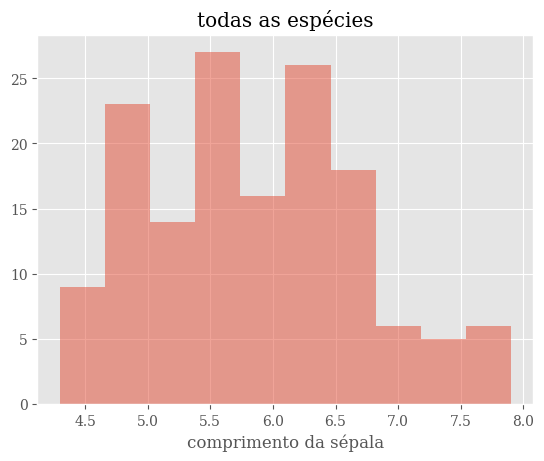

In [71]:
fig, ax = plt.subplots()
ax.hist(iris_2d[:, 0], range=[mínimos[0], máximos[0]],
        bins=10, alpha=0.5)
ax.set_xlabel('comprimento da sépala')
ax.set_title('todas as espécies')
plt.show()

**c.** Vamos tentar analisar as espécies separadamente. Repita o histograma feito acima, porém selecionando apenas indivíduos da espécie `Iris-virginica'`.

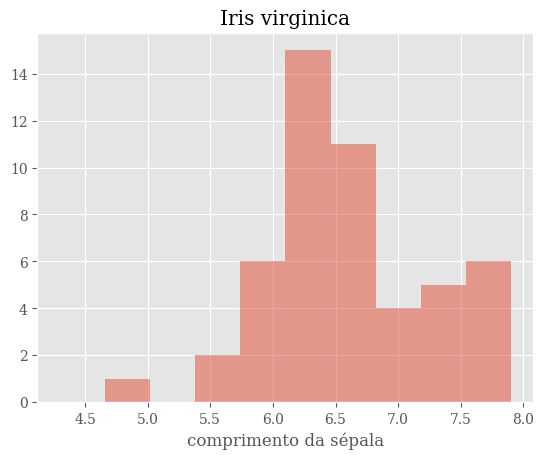

In [72]:
fig, ax = plt.subplots()
seleção = iris_class == 'Iris-virginica'
ax.hist(iris_2d[seleção, 0], range=[mínimos[0], máximos[0]],
        bins=10, alpha=0.5)
ax.set_xlabel('comprimento da sépala')
ax.set_title('Iris virginica')
plt.show()

**d.** Faça o histograma do comprimento da sépala para todas as espécies, no mesmo gráfico.

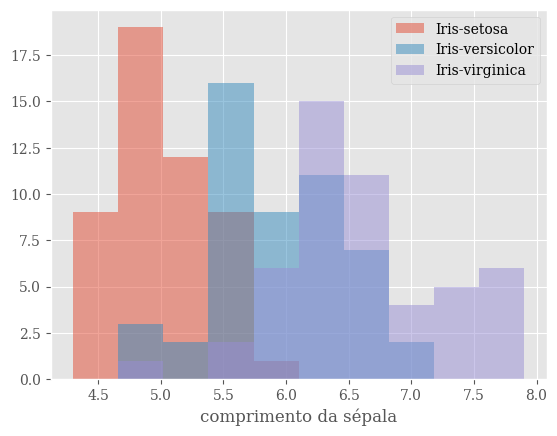

In [73]:
fig, ax = plt.subplots()
for c in np.unique(iris_class):
    seleção = iris_class == c
    ax.hist(iris_2d[seleção, 0], range=[mínimos[0], máximos[0]],
            bins=10, alpha=0.5, label=c)
ax.set_xlabel('comprimento da sépala')
ax.legend()
plt.show()

**e.** Vamos agora ver como as diferentes informações presentes nas 4 colunas se relacionam. Faça o gráfico do comprimento da pétala em relação ao comprimento da sépala, separando por espécie. Desenhe todos os gráficos na mesma figura.

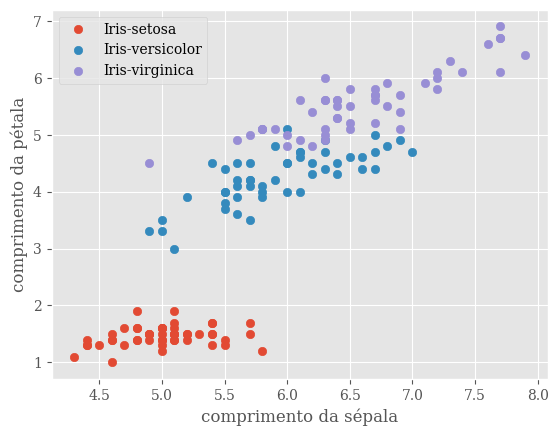

In [74]:
fig, ax = plt.subplots()
for c in np.unique(iris_class):
    seleção = iris_class == c
    ax.scatter(iris_2d[seleção, 0], iris_2d[seleção, 2], label=c)
ax.set_xlabel('comprimento da sépala')
ax.set_ylabel('comprimento da pétala')
ax.legend()
plt.show()

**f.** Repita a figura acima, mas para a largura ao invés do comprimento.

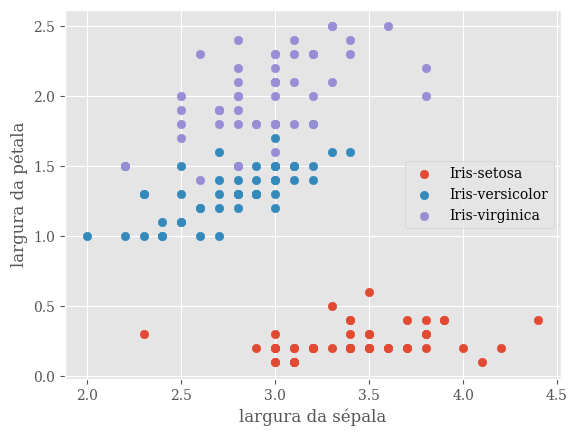

In [75]:
fig, ax = plt.subplots()
for c in np.unique(iris_class):
    seleção = iris_class == c
    ax.scatter(iris_2d[seleção, 1], iris_2d[seleção, 3], label=c)
ax.set_xlabel('largura da sépala')
ax.set_ylabel('largura da pétala')
ax.legend()
plt.show()

**g.** Crie um novo array contendo 3 linhas, e 4 colunas. Em cada linha devem estar os dados de cada espécie. Em cada coluna, o valor médio desta coluna no array `iris_2d`, referente à espécie de cada linha. Verifique se os resultados concordam com os gráficos.

In [76]:
espécies = np.unique(iris_class)
média_espécie = np.zeros((len(espécies), iris_2d.shape[1]))
for i in range(len(espécies)):
    c = espécies[i]
    seleção = iris_class == c
    média_espécie[i] = np.mean(iris_2d[seleção], axis=0)
print(média_espécie)

[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
